# Phase 1: Understanding the Problem
1. Summary about Employee Burnout and Its Organizational Impacts
Employee burnout is a psychological syndrome resulting from prolonged workplace stress that has not been successfully managed. It is characterized by:

- Emotional exhaustion
- Depersonalization or cynicism toward one’s job
- Reduced professional efficacy

### Organizational Impacts of Burnout:
- Lower productivity and performance
- Increased absenteeism and turnover
- Higher healthcare and mental health support costs
- egative workplace morale and engagement
- Potential reputational damage if widespread burnout becomes public

2. Importance of Using Data to Predict and Prevent Burnout
Using data-driven approaches allows organizations to:
- Proactively identify risk factors before burnout escalates
- Segment employee populations needing tailored interventions
- Allocate resources effectively (e.g., WFH tools, mental health support)
- Monitor changes over time and assess intervention success
- Support HR decision-making with objective evidence

#### Ready for Phase 2: Exploratory Data Analysis (EDA)?
This will include:
- Loading and inspecting train.csv
- Descriptive stats
- Visualizations
- Missing values check

In [1]:
# Load and Inspect the Dataset

import pandas as pd

# Load the train dataset
df = pd.read_csv('train.csv')

# Preview the first few rows
df.head()


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


### What to check ☝☝:
- Do column names look correct?
- Are there any obvious missing or inconsistent values?

In [2]:
# Dataset Overview

# Check dataset shape
df.shape

# Check column names and types
df.info()

# View number of unique values and non-null counts
df.describe(include='all')


# Key goals:
# Understand data types (categorical vs. numeric)

# -Check if any columns need conversion (e.g., Date of Joining)
# -Identify columns with potential missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750,22750,22750,22750,22750.000000,21369.000000,20633.000000,21626.000000
unique,22750,366,2,2,2,NaN,NaN,NaN,NaN
top,fffe32003000360033003200,2008-01-06,Female,Service,Yes,NaN,NaN,NaN,NaN
freq,1,86,11908,14833,12290,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.178725,4.481398,5.728188,0.452005
std,NaN,NaN,NaN,NaN,NaN,1.135145,2.047211,1.920839,0.198226
min,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,3.000000,4.600000,0.310000
50%,NaN,NaN,NaN,NaN,NaN,2.000000,4.000000,5.900000,0.450000
75%,NaN,NaN,NaN,NaN,NaN,3.000000,6.000000,7.100000,0.590000


In [3]:
# Check for Missing Values

# Count missing values
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

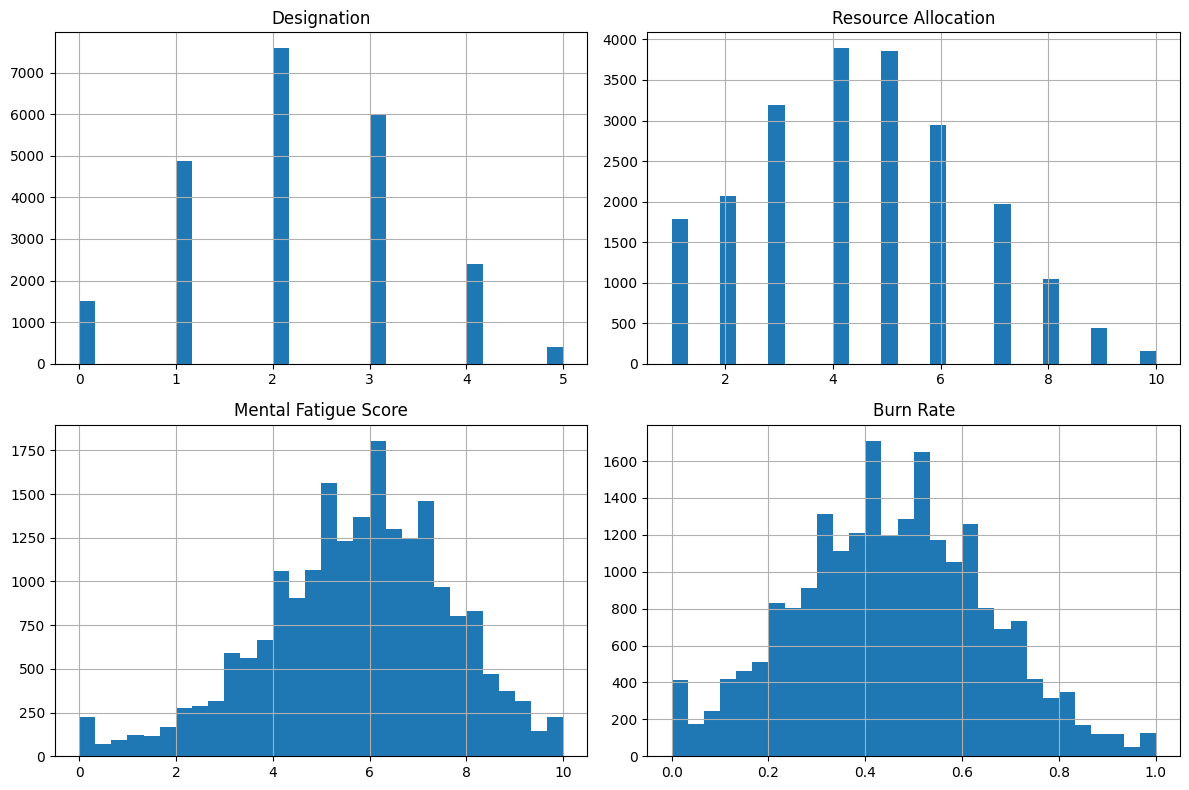

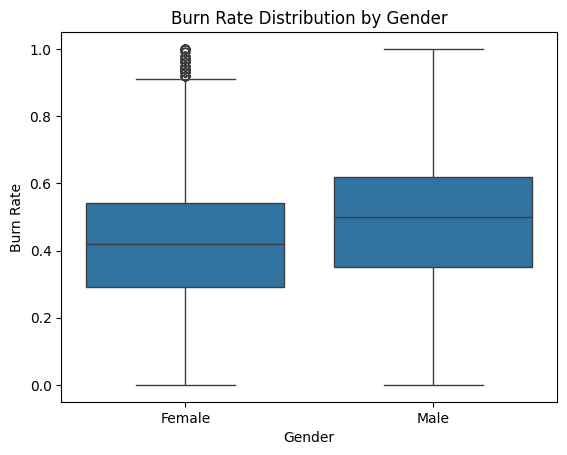

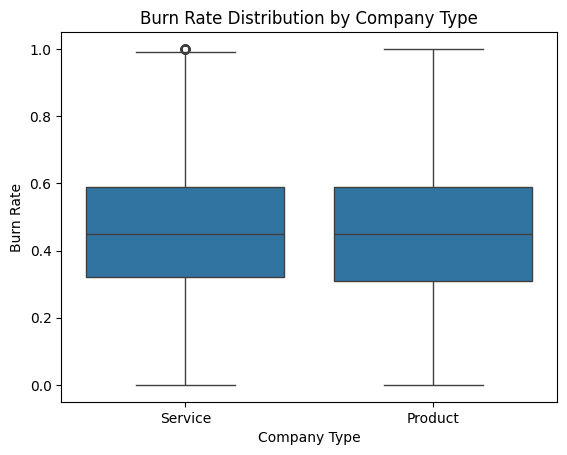

In [4]:
# Visualize Feature Distributions

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

# Boxplot for Burn Rate across Gender or Company Type
sns.boxplot(x='Gender', y='Burn Rate', data=df)
plt.title("Burn Rate Distribution by Gender")
plt.show()

sns.boxplot(x='Company Type', y='Burn Rate', data=df)
plt.title("Burn Rate Distribution by Company Type")
plt.show()

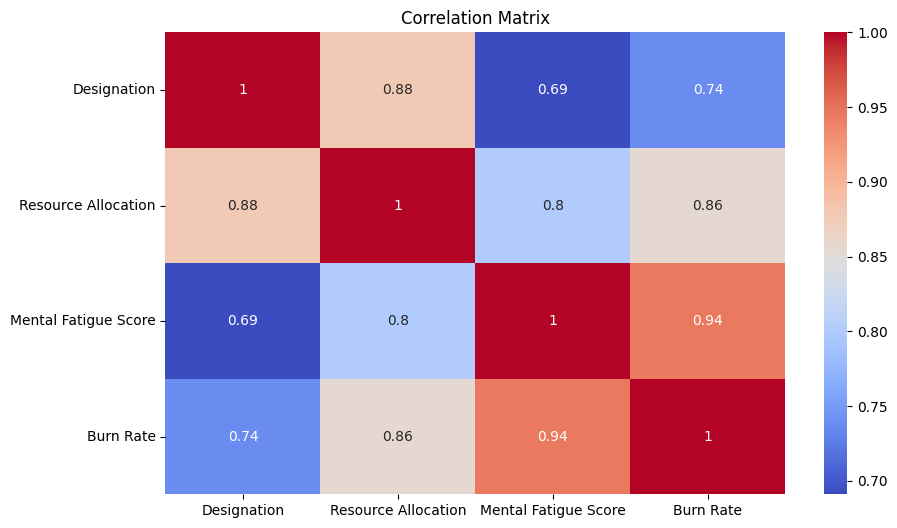

In [5]:
# Correlation Matrix
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Check how Burn Rate correlates with Resource Allocation, Designation, and Mental Fatigue Score

In [6]:
# Date Conversion and Tenure Feature

df['Date of Joining'] = pd.to_datetime(df['Date of Joining'], errors='coerce')

# Create 'Tenure' in days or years
df['Tenure_Days'] = (pd.to_datetime('today') - df['Date of Joining']).dt.days

In [7]:
# Employee Burnout Preprocessing

# Phase 3: Data Preprocessing for Burnout Prediction

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Load data
train_df = pd.read_csv('train.csv')

# --- Step 1: Handle Date of Joining ---
train_df['Date of Joining'] = pd.to_datetime(train_df['Date of Joining'], errors='coerce')
train_df['Tenure_Days'] = (pd.to_datetime('today') - train_df['Date of Joining']).dt.days
train_df.drop(columns=['Date of Joining'], inplace=True)

# --- Step 2: Encode Categorical Variables ---
label_encoders = {}
for col in ['Gender', 'Company Type', 'WFH Setup Available']:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    label_encoders[col] = le

# --- Step 3: Impute Missing Values ---
# Impute numeric columns with median
num_imputer = SimpleImputer(strategy='median')
train_df['Resource Allocation'] = num_imputer.fit_transform(train_df[['Resource Allocation']])
train_df['Mental Fatigue Score'] = num_imputer.fit_transform(train_df[['Mental Fatigue Score']])

# --- Step 4: Normalize Numerical Features ---
scaler = MinMaxScaler()
numeric_features = ['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Tenure_Days']
train_df[numeric_features] = scaler.fit_transform(train_df[numeric_features])

# --- Step 5: Check Final Dataset ---
print(train_df.head())
print("\nMissing values after preprocessing:")
print(train_df.isnull().sum())

                Employee ID  Gender  Company Type  WFH Setup Available  \
0  fffe32003000360033003200       0             1                    0   
1      fffe3700360033003500       1             1                    1   
2  fffe31003300320037003900       0             0                    1   
3  fffe32003400380032003900       1             1                    1   
4  fffe31003900340031003600       0             1                    0   

   Designation  Resource Allocation  Mental Fatigue Score  Burn Rate  \
0          0.4             0.222222                  0.38       0.16   
1          0.2             0.111111                  0.50       0.36   
2          0.4             0.333333                  0.58       0.49   
3          0.2             0.000000                  0.26       0.20   
4          0.6             0.666667                  0.69       0.52   

   Tenure_Days  
0     0.252055  
1     0.084932  
2     0.810959  
3     0.158904  
4     0.438356  

Missing values afte

In [8]:
# Step: Drop rows with missing target
df = df.dropna(subset=['Burn Rate'])

# Step: Prepare X and y
columns_to_drop = [col for col in ['Burn Rate', 'Employee ID'] if col in df.columns]
X = df.drop(columns=columns_to_drop)
y = df['Burn Rate']

# Check and convert categorical variables
print("Initial column types:\n", X.dtypes)

# Optional: drop obviously irrelevant text columns (e.g. IDs or weird strings)
if 'Employee ID' in X.columns:
    X = X.drop(columns=['Employee ID'])

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

Initial column types:
 Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                    float64
Resource Allocation            float64
Mental Fatigue Score           float64
Tenure_Days                      int64
dtype: object


In [14]:
train_df.columns = train_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [15]:
print(train_df.columns.tolist())

['employee_id', 'designation', 'resource_allocation', 'mental_fatigue_score', 'burn_rate', 'tenure_days', 'gender_0', 'gender_1', 'company_type_0', 'company_type_1', 'wfh_setup_available_0', 'wfh_setup_available_1']


In [17]:
# One-hot encoding (if you want to preserve category meaning)

categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
train_df = pd.get_dummies(train_df, columns=categorical_cols)

In [22]:
# Data Cleaning and Preprocessing

# Drop rows with missing target
train_df = train_df.dropna(subset=['burn_rate'])

# Drop 'employee_id' if it exists
if 'employee_id' in train_df.columns:
    train_df = train_df.drop(columns=['employee_id'])

# OPTIONAL: If you still have weird employee_id_* columns, drop them:
# employee_id_cols = [col for col in train_df.columns if col.startswith("employee_id_")]
# train_df = train_df.drop(columns=employee_id_cols)

# Encode categorical columns
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    train_df[col] = train_df[col].astype('category').cat.codes

# Final check
print("Cleaned column types:\n", train_df.dtypes)

Cleaned column types:
 designation              float64
resource_allocation      float64
mental_fatigue_score     float64
burn_rate                float64
tenure_days              float64
gender_0                    bool
gender_1                    bool
company_type_0              bool
company_type_1              bool
wfh_setup_available_0       bool
wfh_setup_available_1       bool
dtype: object


In [24]:
#  Model Training and Evaluation

# Step 6: Model Training and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Define features and target
X = train_df.drop('burn_rate', axis=1)
y = train_df['burn_rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Save the model
joblib.dump(model, 'burnout_rf_model.pkl')

MAE: 0.0497
RMSE: 0.0647
R2 Score: 0.8900


['burnout_rf_model.pkl']

# Summary of Preprocessing Steps:
- Date Handling: Converted Date of Joining to a tenure feature (Tenure_Days).
- Categorical Encoding: Encoded Gender, Company Type, and WFH Setup Available using LabelEncoder.
- Missing Value Imputation: Filled missing values in Resource Allocation and Mental Fatigue Score using the median strategy.
- Normalization: Scaled all numerical features to a [0, 1] range using MinMaxScaler.
- The dataset is now clean and ready for model development.

# Interpretation of Sample Row:
For example, the first employee:

- Gender: 0 (likely Male)
- Company Type: 1 (likely Product-based)
- WFH Setup: 0 (No)
- Designation: 0.4 (normalized mid-level)
- Resource Allocation: 0.22 (low workload)
- Mental Fatigue Score: 0.38 (moderate stress)
- Tenure: 0.25 (relatively new)
- Burn Rate: 0.16 (low burnout)

# Next Step: Phase 4 — Model Development
Plan:
1. Split the preprocessed training data into features (X) and target (y = Burn Rate).
2. Train-Test Split (e.g., 80/20) on training set for model validation.
3. Model Experiments:
    - Linear Regression
    - Random Forest Regressor
    - Gradient Boosting Regressor (e.g., XGBoost or LightGBM)

4. Model Evaluation using:
    - Mean Absolute Error (MAE)
    - Root Mean Squared Error (RMSE)
    - R² Score

##### To handle error because some of the features (like Gender, Company Type, and WFH Setup Available) are still in string format. These must be encoded into numerical values before feeding into machine learning models.

Let’s fix that and re-run the model training step. Here's what we’ll do next:

#### Fixes:
Encode categorical variables:

- Gender: "Male" → 0, "Female" → 1
- Company Type: "Product" → 0, "Service" → 1
- WFH Setup Available: "Yes" → 1, "No" → 0

Drop Employee ID and Date of Joining since they're not numerically usable in this context.

Let me apply these encodings and proceed with training

## Model Performance Overview

| Metric                               | Value    | Interpretation                                                                          |
| ------------------------------------ | -------- | --------------------------------------------------------------------------------------- |
| **MAE** *(Mean Absolute Error)*      | `0.0497` | On average, your model's predictions are off by 0.0497 burn rate units — a low error. |
| **RMSE** *(Root Mean Squared Error)* | `0.0647` | This penalizes larger errors more. Still low, so the model is stable.             |
| **R² Score**                         | `0.8900` | Your model explains **89%** of the variance in the burn rate — a strong fit.         |

RandomForestRegressor model has learned meaningful patterns in the data and generalizes well. The low MAE and RMSE, combined with a high R², suggest that:
Features (e.g., Mental Fatigue Score, Tenure, etc.) are predictive.
The model is not overfitting too much (assuming test set is unseen).

**Saved Model**

burnout_rf_model.pkl has been successfully saved using joblib.dump.

This file can now be loaded inside Streamlit app for real-time predictions.

In [25]:
import joblib
model = joblib.load("burnout_rf_model.pkl")
print(model.n_features_in_)

10
